# **Gaussian Mixture Models**



## **How it works**

Gaussian Mixture Model (GMM) is a type of clustering algorithm that is centered on the assumption that the data comes from class specific gaussian distributions. GMMs are great for data that isnt fully seperated, since it lies on probability instead of hard boundaries. Instead of having circular shaped clusters like k-means, the clusters are elliptical shape since they take the form of a gaussian distribution. The goal of the algorithm is to optimize the mean of each cluster distribution and covariance matrix in a way that maximizes the probability of the entire data set being covered by the distributions. This algorithm is called the Expectation-Maximization Algorithm.

##**K Means vs. GMM on Two Datasets**

The first data set that I am going to use in comparing K Means vs GMM is an anistrophic blob dataset, where the clusters are in the shape of an ellipse. Here is the data visualized:

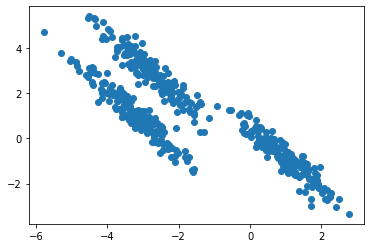

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs

plt.scatter(X_aniso[:,0], X_aniso[:,1])
plt.show()

Now, lets see how K means does. Here is the results:

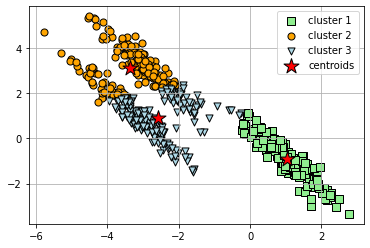

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, max_iter = 100)

km_preds = km.fit_predict(X_aniso)

# plot the 3 clusters
plt.scatter(
    X_aniso[km_preds == 0, 0], X_aniso[km_preds == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_aniso[km_preds == 1, 0], X_aniso[km_preds == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X_aniso[km_preds == 2, 0], X_aniso[km_preds == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

As you can see, KMeans performed poorly. Cluster 1 was classified decently, but clusters 2 and 3 were mixed up. Now, lets see how the GMM model classification does.

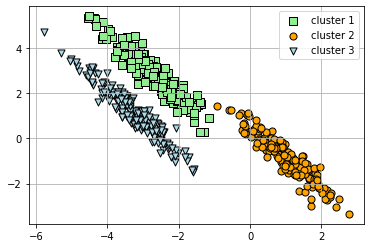

In [14]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3)

gm_preds = gm.fit_predict(X_aniso)

# plot the 3 clusters
plt.scatter(
    X_aniso[gm_preds == 0, 0], X_aniso[gm_preds == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_aniso[gm_preds == 1, 0], X_aniso[gm_preds == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X_aniso[gm_preds == 2, 0], X_aniso[gm_preds == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


plt.legend(scatterpoints=1)
plt.grid()
plt.show()


As you can see, GMM predicted the clusters with near perfect accuracy. Each cluster is distinct, and there is no overlap. The performance increase is due to the fact that the data is gaussian shaped, which lends itself to being better classified by GMM rather than KMeans.

**Now, we will compare performance on another data set. This time, we will be using crescent moon shaped data. Since the shape isnt gaussian nor dense like circular data, both algorithms should perform poorly. Here is the data visualized.**

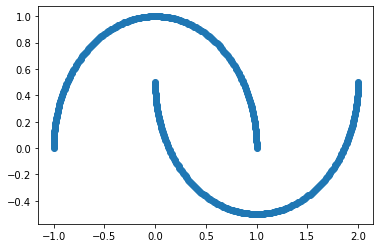

In [15]:
from sklearn.datasets import make_moons

X_moons, y = make_moons(n_samples=n_samples, random_state=random_state)

plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show()

Lets see how KMeans performs:

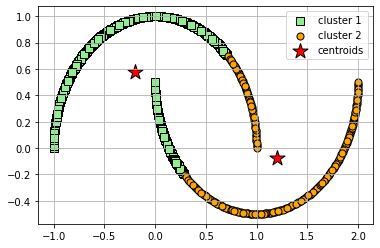

In [16]:
km = KMeans(n_clusters = 2, max_iter = 100)

km_preds = km.fit_predict(X_moons)

# plot the 2 clusters
plt.scatter(
    X_moons[km_preds == 0, 0], X_moons[km_preds == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_moons[km_preds == 1, 0], X_moons[km_preds == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


As you can see, KMeans performed poorly. The clusters are mixed near the center of the data. Lets now look at the GMM results:

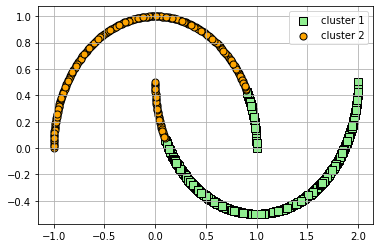

In [17]:
gm = GaussianMixture(n_components=2)

gm_preds = gm.fit_predict(X_moons)

# plot the 2 clusters
plt.scatter(
    X_moons[gm_preds == 0, 0], X_moons[gm_preds == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_moons[gm_preds == 1, 0], X_moons[gm_preds == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()


The GMM model did the same thing as the KMeans model by mixing up the data in the center. Both models performed poorly because of the geometric shape of the data. For KMeans to perform well, the data should be dense (close together), and for GMM to perform well the data should be gaussian shaped.

# **Limitations and Strengths of KMeans and GMM**

From the experiments, it is clear what the strengths and limitations of both models are. For KMeans, its strength is shown whenever the data is dense and circular. It will cluster accurately and easily due to the simple nature of the data. However, things go wrong whenever the data is not dense, as well as when you dont know the number of clusters to use. However the latter can be solved using the elbow method, which takes more computation. Once the datas underlying geometric shape is complex and sparse, KMeans quickly falls apart. Another limitation of KMeans is that it is very sensitive to outliers. Outliers could be actual points, or errors/noise in the data. KMeans doesnt deal with this well. In order to fix this, we'd need to remove this outliers. 

On the other hand, GMM does well with data that is not dense. GMM assumes that the underlying geometric shape of the data is gaussian, so it does extremely well in classifying data that has an ellipse like structure. And since a lot of real world data is in fact gaussian, GMM is more robust than KMeans. However if the data isnt gaussian, GMM fails terribly. Another limitation of GMMs is the amount of parameters you have to optimize. The mean vector, the covariance matrix, and the maximization of PI is a lot to take care of, which usually requires large amounts of data. But, the more data there is, the more likely it is to be gaussian, so that is an upside.

So all in all, unsupervised clustering comes down to knowing the underlying geometric structure of your data. Once you figure that out, then choosing which clustering model to use becomes simple and straightforward. Last week, I actually read a paper and presented its findings on this topic, with diffusion maps. The goal of diffusion maps is to first figure out the deep underlying structure of the data, then it classifies with ease. Before, I never thought about data having different strucutres when you look at it from different angles, but now I know that this matters more than anyhting else when it comes to unsupervised learning.


Sources:
"Comparative Study of K-Means and Hierarchical Clustering Techniques" -Kaushik

https://sites.northwestern.edu/msia/2016/12/08/k-means-shouldnt-be-our-only-choice/

# **Swiss Dataset**

Now, lets take a look at the swiss dataset.

In [34]:
import pandas as pd

data = pd.read_csv("https://www.stat.auckland.ac.nz/~wild/data/Rdatasets/csv/datasets/swiss.csv")

data.head(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6


##**KMeans**

We will now find the cluster k that maximizes the average silhouette score, and perform clustering. Silhouette score is the measure of how similar a datapoint is to other datapoints in the cluster, compared with all other data points. Maximizing the average means we have the most in cluster cohesion and cluster separation.

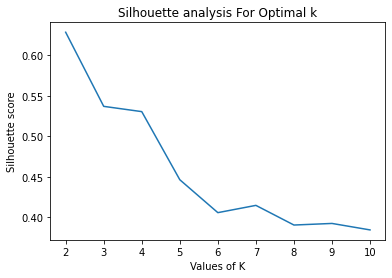

In [22]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(data, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k, KMeans")
plt.show()

The silhoulette score is maximized at 2 clusters, so we will use k = 2. Here is the analysis:

In [28]:
km = KMeans(n_clusters=2)
km_preds = km.fit_predict(data)

print(silhouette_score(data, km_preds))

0.6284001534707652


## **GMM**

Now lets find the optimal k for GMM, and look at its silhoulette score.

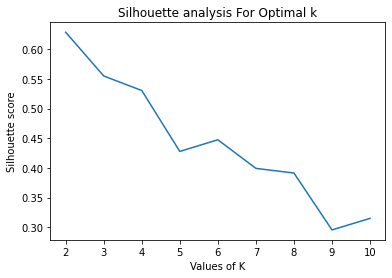

In [27]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 gm = GaussianMixture(n_components=num_clusters)
 gm_preds = gm.fit_predict(data)

 cluster_labels = gm_preds
 
 # silhouette score
 silhouette_avg.append(silhouette_score(data, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k, GMM")
plt.show()

The maximum silhoulette score for GMM is when k = 2, so we will use k = 2 for GMM as well. Heres the analysis:

In [29]:
gm = GaussianMixture(n_components=2)
gm_preds = km.fit_predict(data)

print(silhouette_score(data, gm_preds))

0.6284001534707652


The silhoulette score is the same for KMeans and GMM, so it seems to be independent of the algorithm used, therefore its not sensitive to the model. It seems to just be dependent on the number of clusters/components.

# **Visualization**

Now, lets visualize the results using two of the features. I am going to use PCA in order to see why k = 2. Using PCA will allow easy 2D visualization, without the possibility of removing some of the most important features of the data set. Doing this could skew the results.

In [60]:
import statistics

std = [0,0,0,0,0,0]

for i in range(len(data.axes[1])):
  feature = data.iloc[:,i]
  std[i] = statistics.stdev(feature)

print(std)

[12.491697150000338, 22.71121787149008, 7.977883397039735, 9.615407386296242, 41.70485028372347, 2.912696694671904]


From calculating the standard deviation, it seems that the variables "Agriculture" and "Catholic" carry the most spread (Catholic by far), so we will use these two variables in our visualization. I will also create a line of just Catholic, since it has the most standard deviation by far.

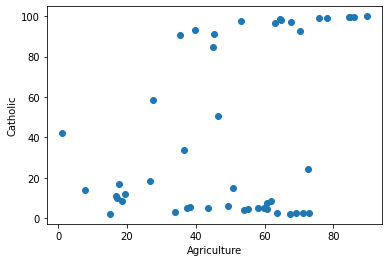

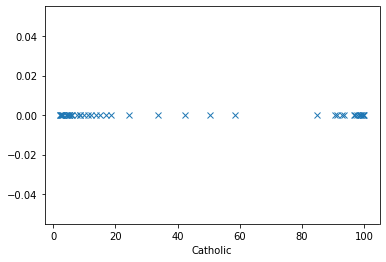

In [74]:
plt.scatter(data[["Agriculture"]], data[["Catholic"]])
plt.xlabel("Agriculture")
plt.ylabel("Catholic")
plt.show()

val = 0. # this is the value where you want the data to appear on the y-axis.
plt.plot(data[["Catholic"]], np.zeros_like(data[["Catholic"]]) + val, 'x')
plt.xlabel("Catholic")
plt.show()

From the visualization, the data points seem very spread out. I can see the two clusters, though (the top right and bottom). The gap in the middle is huge, besides the few outliers that lie in the middle. In the bottom cluster, you have low percentage catholic and varying % of males involved in agriculture. In the top cluster, you have a high percentage of catholic, and a higher percentage of males involved in agriculture. From the visual, the distinctive measure in determining what cluster a province would belong to is the % catholic. So the algorithm is clustering catholic vs. non catholic provinces. Maybe with more provinces (data), the number of clusters would increase as the more 50/50 religion provinces would appear, as well as different factors. It could be the case that the religion becomes too dense to cluster by, so the algorithms would have to base it off of something more distinct.

All in all, since the standard deviation of the catholic feature is the largest by far (nearly double that of agriculture), this is what the clustering algorithm will base the clusters off of. In the second plot you can clearly see the two clusters, just based off of Catholic. Therefore with this data, two clusters is the most optimal.

If the standard deviations were more similar, then maybe the algorithm would have to increase the number of clusters, or even perform worse all together. But from the data we have, there is a very clear distinction of low to 0% catholic, and nearly 100% catholic provinces.